### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

### Likelihood of *k* and delta *k*

In [4]:
filename = './Results/summary.txt'
Kdf = pd.read_csv(filename, sep='\t')
Kdf

,K,Reps,mean est. LnP(Data),stdev est. LnP(Data)
0,1,1,-922894.4,0.0
1,2,1,-911563.7,0.0
2,3,1,-904170.7,0.0
3,4,1,-899989.3,0.0
4,5,1,-897270.2,0.0
5,6,1,-899209.6,0.0
6,7,1,-896302.9,0.0
7,8,1,-896682.8,0.0


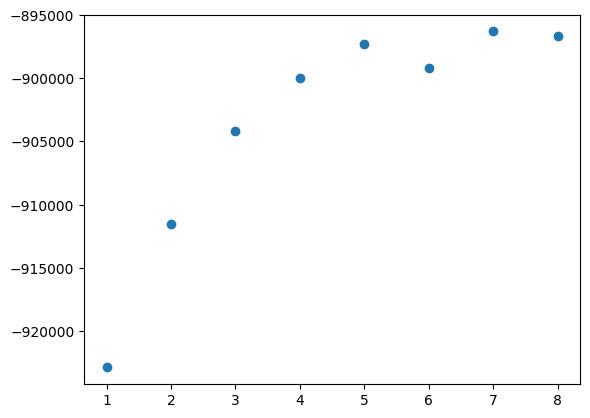

In [9]:
plt.scatter(x = Kdf['K'], y = Kdf['mean est. LnP(Data)'])

In [6]:
Kdf['delta_k'] = Kdf['mean est. LnP(Data)'].diff()
Kdf

,K,Reps,mean est. LnP(Data),stdev est. LnP(Data),delta_k
0,1,1,-922894.4,0.0,NaN
1,2,1,-911563.7,0.0,11330.7
2,3,1,-904170.7,0.0,7393.0
3,4,1,-899989.3,0.0,4181.4
4,5,1,-897270.2,0.0,2719.1
5,6,1,-899209.6,0.0,-1939.4
6,7,1,-896302.9,0.0,2906.7
7,8,1,-896682.8,0.0,-379.9


### Parsing *q* files

In [123]:
 def custom_sort(row):
        max_value = max(row)
        return (max_value > 0.5, max_value)

def make_bar_plot(filename, k):
    f = open(filename, "r")
    matrix = []
    columns = range(1,k+1)
    for line in f.readlines():
        line = line.strip().lstrip()
        line = line.split(' ')[1:]
        matrix.append(line)
    
    df = pd.DataFrame(matrix, columns=columns)
    df = df.apply(pd.to_numeric)
    df['max_prob'] = df.iloc[:, :-1].max(axis=1)
    df['cluster_assignment'] = df.iloc[:, :-1].idxmax(axis=1)
    df = df.sort_values(by=['cluster_assignment', 'max_prob'], ascending=[True, False])

    fig, ax = plt.subplots()
    df.iloc[:, :-2].plot(kind='bar', stacked=True, ax=ax, width=1.0)
    plt.xticks([])
    plt.title(f'k = {k}')
    plt.show()


In [115]:
def get_cluster_assignments(filename, k):
    f = open(filename, "r")
    matrix = []
    columns = range(1,k+1)
    for line in f.readlines():
        line = line.strip().lstrip()
        line = line.split(' ')[1:]
        matrix.append(line)
    
    df = pd.DataFrame(matrix, columns=columns)
    df = df.apply(pd.to_numeric)
    df['max_prob'] = df.iloc[:, :-1].max(axis=1)
    df['cluster_assignment'] = df.iloc[:, :-1].idxmax(axis=1)
    return df

In [125]:
def plot_on_geo(filename, k):
    df = get_cluster_assignments(filename, k)
    no_rep_index = pd.read_csv('../data/meta/reduced_indices.txt', sep='\t')['id']
    df['Sample_ID'] = no_rep_index
    geo_data = pd.read_csv('../data/meta/geo/locations.csv')
    geo_data = geo_data.merge(df, on='Sample_ID')
    crs={'init':'epsg:4326'}
    geometry=[Point(xy) for xy in zip(geo_data["longitude"], geo_data["latitude"])]
    geodata=gpd.GeoDataFrame(geo_data,crs=crs, geometry=geometry)
    usa_shapefile = gpd.read_file(r'../data/meta/geo/tl_rd22_us_state.shp')
    river_tributary_shapefile = gpd.read_file(r'../data/meta/geo/ne_10m_rivers_north_america.shp')
    river_primary_shapefile = gpd.read_file(r'../data/meta/geo/ne_10m_rivers_lake_centerlines.shp')
    fig, ax = plt.subplots(figsize=(7,7))
    usa_shapefile.plot(ax=ax, facecolor='White',edgecolor='gray', linewidth=1)
    river_primary_shapefile.plot(ax=ax, linewidth=0.5)
    river_tributary_shapefile.plot(ax=ax, linewidth=0.2)
    ax.set_ylim([28, 50])
    ax.set_xlim([-100, -70])

    for cluster_idx in range(1,k+1):
            cluster = geodata.loc[geodata.cluster_assignment == cluster_idx]
            cluster.plot(ax=ax, markersize=10, label=f'cluster {cluster_idx}')
    plt.legend()
    plt.show()

### *K = 2*

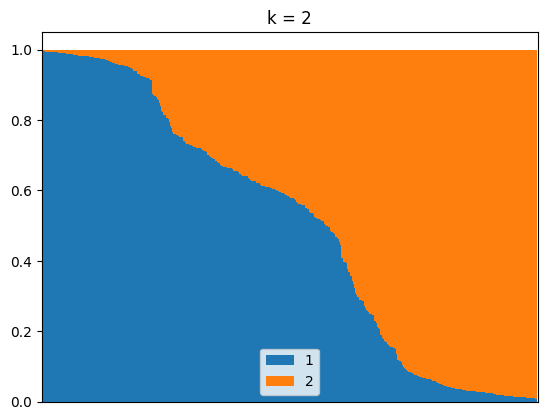

In [143]:
make_bar_plot('./Results/params1_run_2_q', 2)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


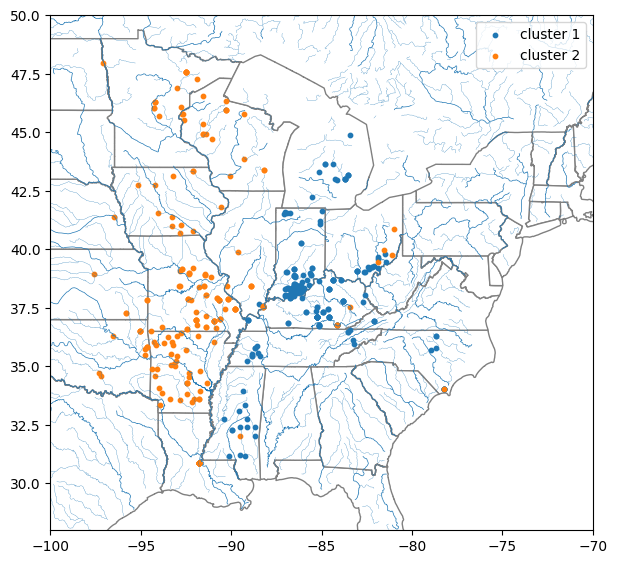

In [144]:
plot_on_geo('./Results/params1_run_2_q', 2)

### *K = 3*

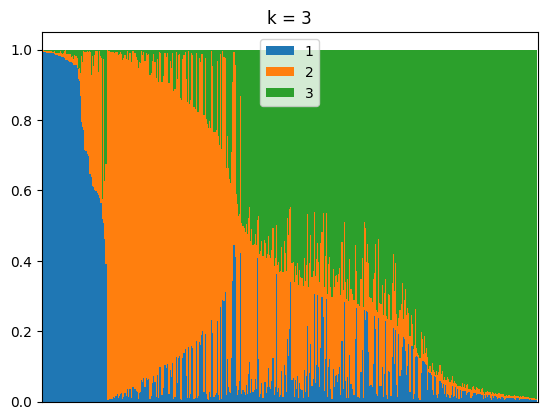

In [131]:
make_bar_plot('./Results/params1_run_3_q', 3)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


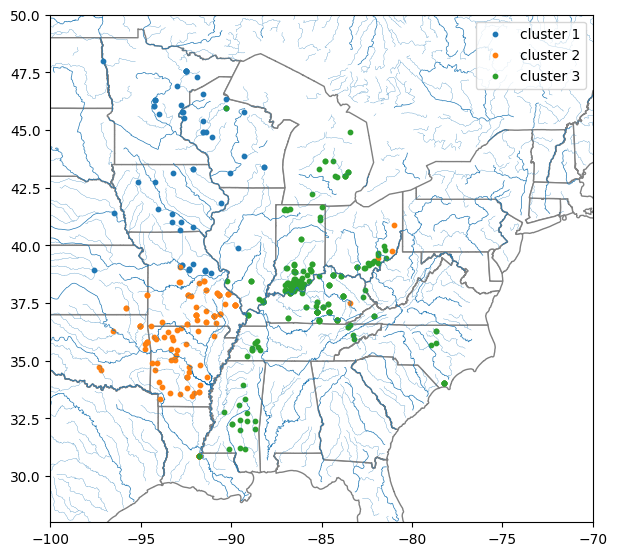

In [132]:
plot_on_geo('./Results/params1_run_3_q', 3)

### *K = 4*

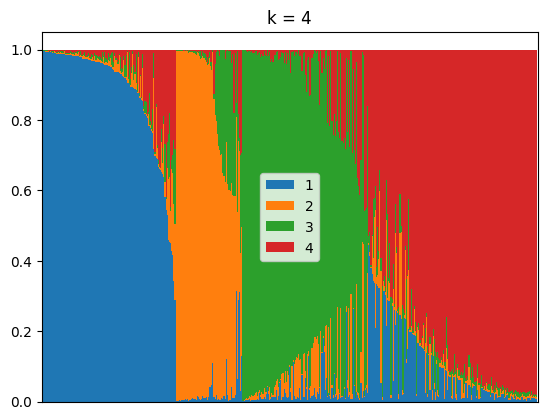

In [133]:
make_bar_plot('./Results/params1_run_4_q', 4)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


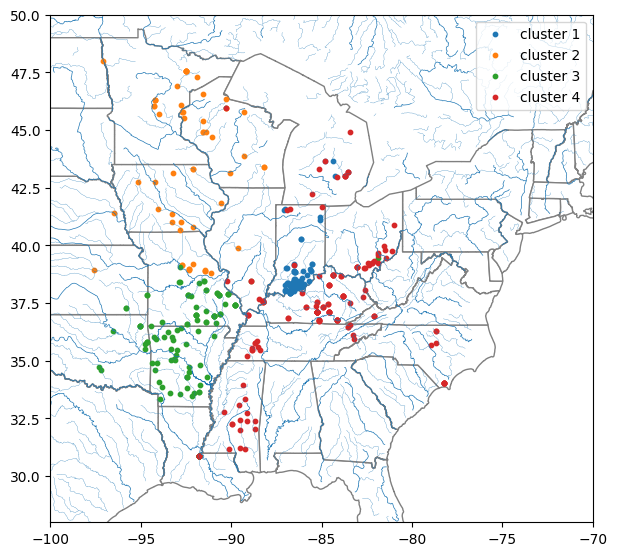

In [134]:
plot_on_geo('./Results/params1_run_4_q', 4)

### *K = 5*

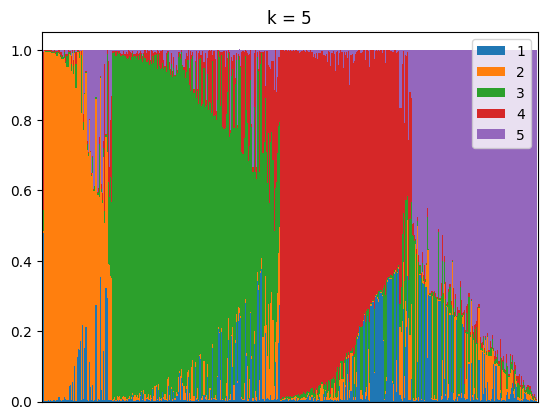

In [135]:
make_bar_plot('./Results/params1_run_5_q', 5)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


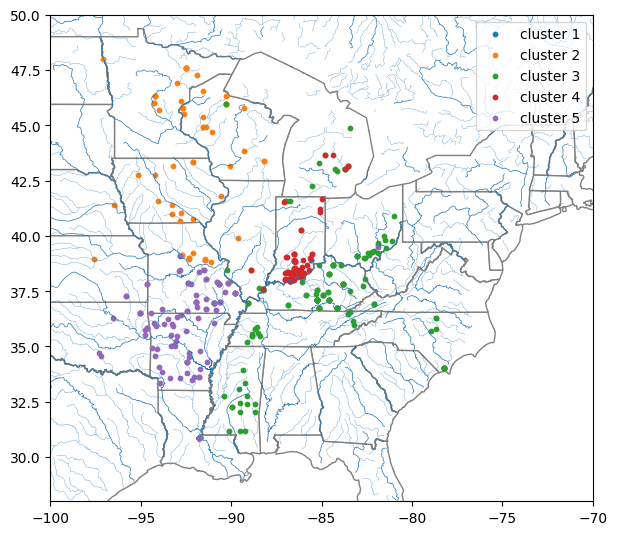

In [136]:
plot_on_geo('./Results/params1_run_5_q', 5)

### *K = 6*

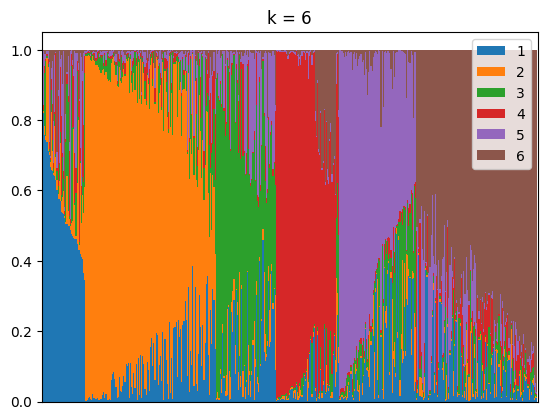

In [137]:
make_bar_plot('./Results/params1_run_6_q', 6)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


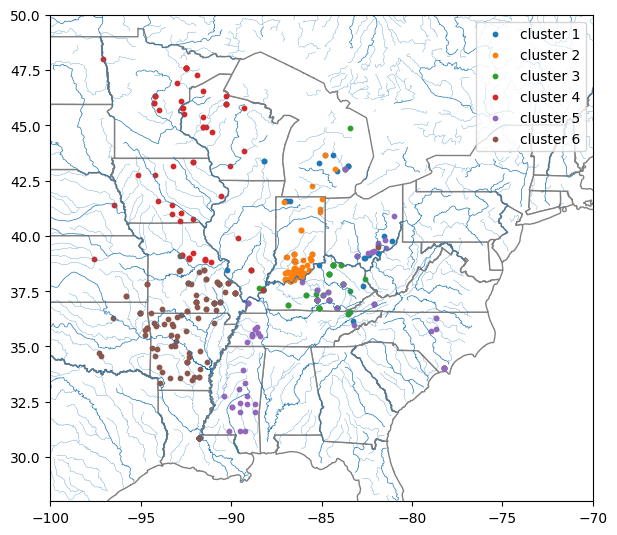

In [138]:
plot_on_geo('./Results/params1_run_6_q', 6)

### *K = 7*

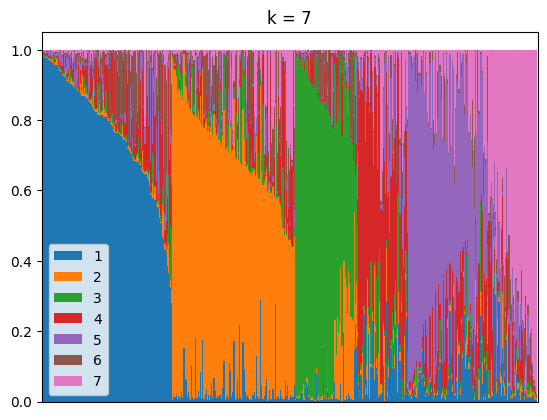

In [139]:
make_bar_plot('./Results/params1_run_7_q', 7)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


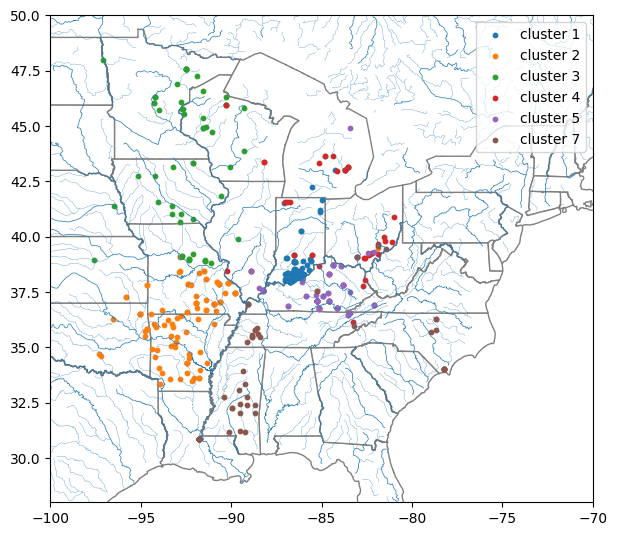

In [140]:
plot_on_geo('./Results/params1_run_7_q', 7)

### *K = 8*

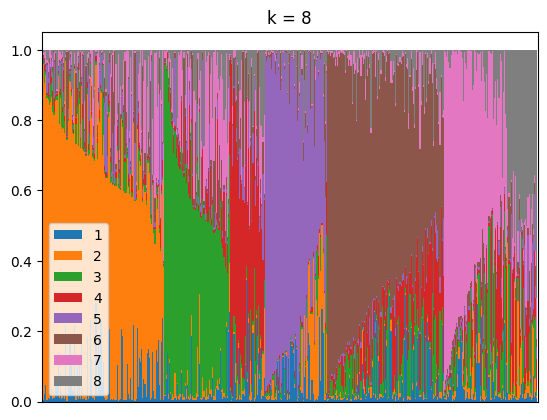

In [141]:
make_bar_plot('./Results/params1_run_8_q', 8)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


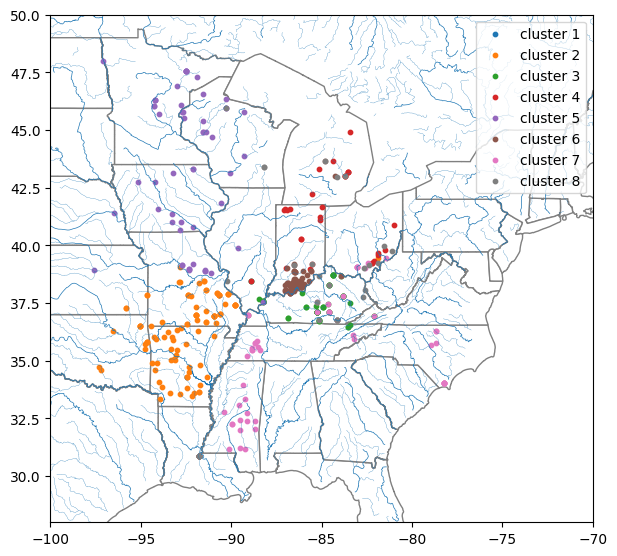

In [142]:
plot_on_geo('./Results/params1_run_8_q', 8)